In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, datasets

In [3]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 44s 3us/step


In [33]:
type(train_labels)

numpy.ndarray

In [7]:
#to convert to a bag of words
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
x_train.shape

(25000, 10000)

In [12]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 226ms/step - loss: 0.5595 - acc: 0.7841 - val_loss: 0.4376 - val_acc: 0.8601
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3513 - acc: 0.8935 - val_loss: 0.3284 - val_acc: 0.8823
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2528 - acc: 0.9177 - val_loss: 0.2883 - val_acc: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1985 - acc: 0.9347 - val_loss: 0.2735 - val_acc: 0.8926
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1615 - acc: 0.9474 - val_loss: 0.2715 - val_acc: 0.8928
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1331 - acc: 0.9585 - val_loss: 0.2903 - val_acc: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1130 - acc: 0.9655 - val_loss: 0.3029 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0952 - 

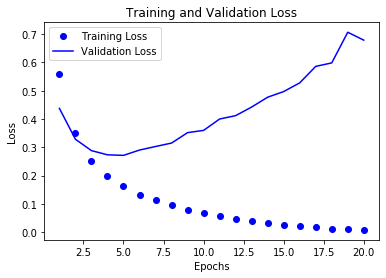

In [25]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

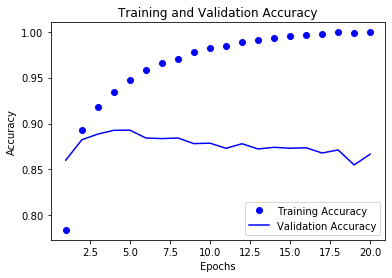

In [27]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = list(range(1, 21))

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
#above graphs demonstrate model overfitting, since validation set peaks
#4 epochs is adequate to prevent an overfitted model
#an overfitted model just memorizes data patterns too much from training set
#and fails to generalize these patterns to new, unseen, test data
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4517 - accuracy: 0.8253
Epoch 2/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2615 - accuracy: 0.9092
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2038 - accuracy: 0.9275
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2924 - accuracy: 0.8849


[0.2924225330352783, 0.8849200010299683]

In [31]:
#model accuracy for test_set = 88.5%
#using our trained neural network model to make predictions
model.predict(x_test)

array([[0.19368607],
       [0.9999567 ],
       [0.8489101 ],
       ...,
       [0.11284569],
       [0.072557  ],
       [0.5727276 ]], dtype=float32)